In [1]:
"""
Reads 6 time series variables from postgres, explores their trends in a line chart, 
and serialize them to 'rates.pickle'.
"""
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

rates = pd.read_sql('''SELECT performance_date AS "Performance Date",
                              mortgage30us AS "30-Year Mortgage",
                              mortgage15us AS "15-Year Mortgage",
                              mortgage5us AS "5/1 Adjustable Rate Mortgage",
                              mortpts30us AS "Origination Fees/Discounts for 30-Year Mortgage",
                              mortpts15us AS "Origination Fees/Discounts for 15-Year Mortgage",
                              mortpts5us AS "Origination Fees/Discounts for 5/1 Adjustable Rate Mortgage"
                       FROM fred
                       ORDER BY performance_date'''
                    , con = psycopg2.connect('''host = localhost 
                                                dbname = fn 
                                                user = postgres 
                                                password = john''')
                   ).set_index('Performance Date')

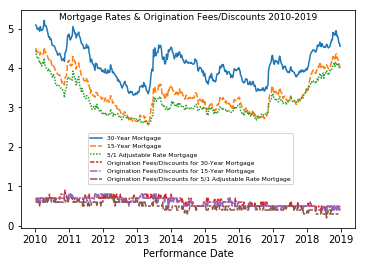

In [2]:
ax = sns.lineplot(data = rates)
ax.set_title('Mortgage Rates & Origination Fees/Discounts 2010-2019',
             position = (.5, .93),
             fontsize = 9
            )
ax.legend(fontsize = 6, 
          loc = (.2, .2)
         )

In [3]:
rates.to_pickle('../data/rates.p')